In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

AttributeError: partially initialized module 'pandas' has no attribute 'core' (most likely due to a circular import)

In [12]:
pip install --upgrade pandas

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


In [ ]:
cancer = pd.read_csv('Cancer.csv')

In [ ]:
cancer.head()

In [ ]:
cancer = cancer.loc[:, ~cancer.columns.str.contains('^Unnamed')]

In [ ]:
cancer.head()

## 1. Data Exploration and Visualization

In [ ]:
sns.histplot(cancer['radius_worst'], binwidth=1)

The dirtibution chart shows the radius_worst is normally distributed, peaks at 13-14. The distribution appears to be right-skewed, as the tail on the right side of the distribution is longer or fatter than the left side. This suggests that the majority of the samples have a smaller 'radius_worst' value, while fewer samples have very large 'radius_worst' values.

In [ ]:
sns.scatterplot(x = 'texture_mean', y = 'texture_worst', data = cancer)

There appears to be a positive correlation between 'texture_mean' and 'texture_worst'. As 'texture_mean' increases, 'texture_worst' also tends to increase. This suggests that tumors with a higher average texture also tend to have a higher maximum texture measurement.

In [ ]:
sns.boxplot(cancer['area_mean'])

The median line is closer to the bottom, indicating the area_mean is skwed. And there are some outliers, presented as Dots above the Upper Whisker, observed in the boxplot

In [ ]:
sns.jointplot(x='perimeter_mean',y='perimeter_worst',data=cancer)

There's a clear positive correlation between the two variables, indicating that as the 'perimeter_mean' increases, the 'perimeter_worst' tends to increase as well. The 'worst' or maximum value is expected to be larger when the average value is larger. The top histogram shows the distribution of the 'perimeter_mean' variable. It seems fairly symmetric with a slight right skew, and it gives you an idea of the spread and central tendency of 'perimeter_mean' values in your dataset.

In [ ]:
sns.countplot(x='diagnosis',data=cancer)

This countplot shows there are more benign tumors than malignant tumors. In the dataset, there are about 200 malignant tumors and 350 malignant tumors

In [ ]:
features = ['radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
sns.pairplot(cancer, vars=features,hue='diagnosis')

## 2. Logistic Regression Model Development

In [104]:
cancer.info() # check for na values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

There is no Null data in the dataset, which means its ready to go

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score

In [106]:
cancer['diagnosis_encoded'] = cancer['diagnosis'].map({'M': 1, 'B': 0}) #encode the dependent variable for logistic regression

In [107]:
y = cancer['diagnosis_encoded'] # Set the dependent variable y to be diagnosis_encoded
X = cancer.drop(['diagnosis', 'diagnosis_encoded','id'], axis=1)  # Set everything else as the independent variables X

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # Split the dataset, make 0.3 as the test size

In [109]:
model = LogisticRegression() #Generates the logistic regression model
model.fit(X_train, y_train) #fit X_train and y_train into the logistic regression model

/Users/xinyutu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [110]:
predictions = model.predict(X_test) # use the x_test data to predit the y value

## 3. Model Evaluation

In [1]:
# Get predicted probabilities
predicted_probabilities = model.predict_proba(X_test)[:, 1]

# Calculate the mean of the observed outcomes
mean_outcome = np.mean(y_test)

# Calculate the total sum of squares (SStot)
SStot = np.sum((y_test - mean_outcome) ** 2)

# Calculate the sum of squared residuals (SSres)
SSres = np.sum((y_test - predicted_probabilities) ** 2)

# Calculate R-squared
r_squared = 1 - (SSres / SStot)

print(f'Pseudo R-squared: {r_squared}')

NameError: name 'model' is not defined

In [111]:
r_squared = r2_score(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f"Out-of-Sample R-squared: {r_squared:.2f}")
print(f"Out-of-Sample RMSE: {rmse:.2f}")

Out-of-Sample R-squared: 0.87
Out-of-Sample RMSE: 0.17


The R-squared is 0.87, meaning 87% of the dependent variable is explained by the model.
RMSE is 0.17, meaning that on average, the model's predictions are about 0.17 away from the true class labels 

In [112]:
print(classification_report(y_test,predictions)) #check precision,recall,f1-score using classification report

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       108
           1       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



For class 0, the precision is 0.96, meaning that when it predicts the negative class, it is correct 96% of the time. For class 1, the precision is 0.98, meaning that when it predicts the negative class, it is correct 98% of the time.The accuracy of the model is the ratio of correctly predicted observations to the total observations and is 0.97 for the entire model. Overall, the model is performing very well.

In [113]:
conf_matrix = confusion_matrix(y_test, predictions) # create a confusion matrix for the model performance

In [114]:
print(conf_matrix)

[[107   1]
 [  4  59]]


The model predicted 'negative' 107 times correctly. These are 4 cases that were actually positive and the model also predicted them as negative. The model predicted 'positive' 59 times correctly, but there are 1 case where its actually negative, but the model predicted it as positive.

The model is overall good. However, different error has different cost. In medical field, we want to make less Type II errors because we don't want to tell a patient whose tumor is actually malignant, while it is predicted as benign, making the patients miss their windows to accept treatments. The model has 4 false negative cases, which are much larger than false positive cases.

4. Testing Interactions Between Features

4. Testing Interactions Between Features

## 4.Testing Interactions Between Features

In [125]:
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

In [122]:
from sklearn.preprocessing import PolynomialFeatures

# Exclude target variable and not needed variables
features = cancer.drop(['diagnosis', 'diagnosis_encoded','id'], axis=1) 

# create interaction terms
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

# Fit to the features data and transform it
interaction_features = poly.fit_transform(features)

# Get the feature names 
interaction_feature_names = poly.get_feature_names_out(features.columns)

# Create a DataFrame with the interaction features and names
interaction_df = pd.DataFrame(interaction_features, columns=interaction_feature_names)


In [123]:
interaction_df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,compactness_worst concavity_worst,compactness_worst concave_points_worst,compactness_worst symmetry_worst,compactness_worst fractal_dimension_worst,concavity_worst concave_points_worst,concavity_worst symmetry_worst,concavity_worst fractal_dimension_worst,concave_points_worst symmetry_worst,concave_points_worst fractal_dimension_worst,symmetry_worst fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,0.473841,0.176650,0.306243,0.079140,0.188938,0.327545,0.084645,0.122111,0.031556,0.054706
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,0.045083,0.034708,0.051315,0.016611,0.044938,0.066440,0.021507,0.051150,0.016558,0.024481
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,0.191195,0.103153,0.153372,0.037178,0.109447,0.162730,0.039446,0.087796,0.021282,0.031643
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,0.595061,0.223072,0.575050,0.149870,0.176877,0.455964,0.118834,0.170928,0.044547,0.114837
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,0.082000,0.033313,0.048462,0.015740,0.065000,0.094560,0.030712,0.038415,0.012477,0.018151


In [126]:
X2_sm = sm.add_constant(interaction_df).reset_index(drop=True)

In [127]:
y = y.reset_index(drop=True)

In [128]:
lm2 = sm.OLS(y,X2_sm).fit()

In [129]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      diagnosis_encoded   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     10.15
Date:                Tue, 23 Jan 2024   Prob (F-statistic):           8.77e-32
Time:                        21:06:17   Log-Likelihood:                 700.33
No. Observations:                 569   AIC:                            -468.7
Df Residuals:                     103   BIC:                             1556.
Df Model:                         465                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             10.6967     27.691      0.386      0.700     -44.221      65.615
radius_mean                                        2.6117     24.697      0.106      0.916     -46.370      51.593
texture_mean                                       1.0774      1.017      1.060      0.292      -0.939       3.094
perimeter_mean                                    -1.9520      3.666     -0.532      0.596      -9.223       5.319
area_mean                                          0.1613      0.075      2.136      0.035       0.012       0.311
smoothness_mean                                  -85.8877    211.113     -0.407      0.685    -504.581     332.805
compactness_mean                                 -14.8374    140.843     -0.105      0.916    -294.166     264.491
concavity_mean                                  -147.2533    172.010     -0.856      0.394    -488.395     193.889
concave_points_mean                              302.8526    296.660      1.021      0.310    -285.503     891.208
symmetry_mean                                    -37.7214     93.156     -0.405      0.686    -222.474     147.031
fractal_dimension_mean                          -219.4568    456.792     -0.480      0.632   -1125.395     686.482
radius_se                                       -108.4243     74.356     -1.458      0.148    -255.891      39.043
texture_se                                         0.3156      5.388      0.059      0.953     -10.371      11.002
perimeter_se                                       5.9356      8.873      0.669      0.505     -11.663      23.534
area_se                                            1.0212      0.421      2.427      0.017       0.187       1.856
smoothness_se                                    755.5926   1210.413      0.624      0.534   -1644.976    3156.162
compactness_se                                   -72.5239    511.452     -0.142      0.888   -1086.868     941.820
concavity_se                                     368.1556    362.051      1.017      0.312    -349.887    1086.198
concave_points_se                              -1271.8716    818.761     -1.553      0.123   -2895.691     351.947
symmetry_se                                     -268.9052    437.260     -0.615      0.540   -1136.108     598.297
fractal_dimension_se                            2253.2383   2641.821      0.853      0.396   -2986.191    7492.668
radius_worst                                       9.2931      9.074      1.024      0.308      -8.702      27.288
texture_worst                                     -1.0367      0.969     -1.070      0.287      -2.959       0.885
perimeter_worst                                   -0.0137      1.032     -0.013      0.989   

Text(0, 0.5, 'Frequency')

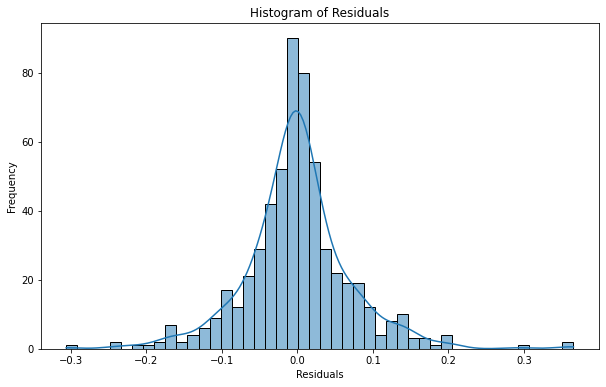

In [130]:
# Create a plot to visualize the distribution of residuals.
residuals = lm2.resid
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

The Distribution plot suggests the residuals seem to be symmetrically distributed around this central point, which supports the assumption of normality.

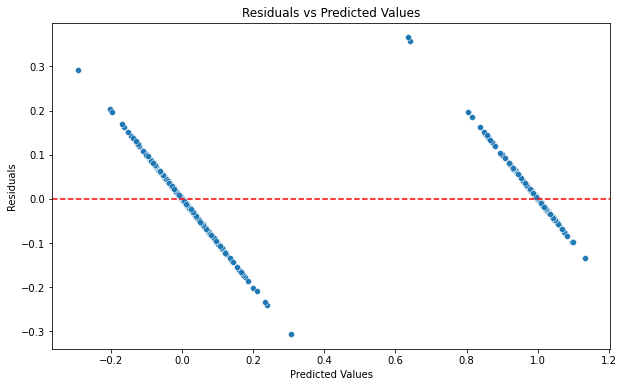

In [132]:
# Craete a visualization to test the homoscedasticity.
predicted_values = lm2.fittedvalues
plt.figure(figsize=(10, 6))
sns.scatterplot(x=predicted_values, y=residuals)
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')

the residuals decrease and then increase as the predicted values increase. It indicates that the residuals are heteroscedastic – the variance of the residuals is not constant and tends to change across the range of predicted values. This is not alike what we got from the distribution plot, a further test is needed

Shapiro-Wilk test statistic: 0.9442411661148071, p-value: 8.545946475436647e-14
Anderson-Darling test statistic: 9.13524722960733, significance levels: [15.  10.   5.   2.5  1. ], critical values: [0.572 0.651 0.782 0.912 1.084]


Text(0.5, 1.0, 'Q-Q Plot of Model Residuals')

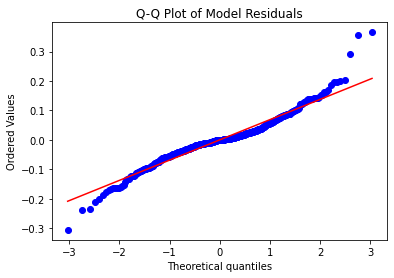

In [133]:
import scipy.stats as stats
# Shapiro-Wilk test
shapiro_test = stats.shapiro(residuals)
print(f"Shapiro-Wilk test statistic: {shapiro_test[0]}, p-value: {shapiro_test[1]}")

# Anderson-Darling test
anderson_test = stats.anderson(residuals, dist='norm')
print(f"Anderson-Darling test statistic: {anderson_test.statistic}, significance levels: {anderson_test.significance_level}, critical values: {anderson_test.critical_values}")

stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Model Residuals')

From the Q-Q plot, the departure from the straight line in the head and tails suggests that the residuals is not be perfectly normally distributed

From the Shapiro-Wilk test, the p-value is  extremly lower than regular signficance level, suggesting the Null hypothesis is rejected and the residuals are not normally distributed.
The Anderson-Darling test statistic = 9.135 is much higher than the critical value even at the 1% level = 1.084, we would again reject the null hypothesis of normality at all conventional significance levels

Influence of the Interaction Terms: There are abundant amount of predictors and interaction terms, which can lead to overfitting, where the model performs well on training data but poorly on unseen data. The R-squared is significantly increased to 0.979, which tells the dependent variable is explained a lot better, but also signs an overfitting.

Interpretation of Interaction Terms: The coefficient of an interaction term represents the change in the effect of one variable on the outcome for a one-unit change in the other variable. For exmaple, the compactness_mean fractal_dimension_worst has a positive coefficient of 1536.5566 indicates that there is an increase in the log odds of the outcome variable diagnosis_encoded being 1 (malignant) when both compactness_mean and fractal_dimension_worst increase together. 

## 5. Feature Selection and Cross-Validation: Full vs. Reduced Model

In [177]:
#Need to build a full model in order to get a benchmark
X = cancer.drop(columns=['diagnosis_encoded', 'diagnosis', 'id'])

y = cancer['diagnosis_encoded']

# Add a constant to the independent variable set for the intercept
X_with_constant = sm.add_constant(X)

# Fit the OLS model
full_model = sm.OLS(y, X_with_constant).fit()
full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      diagnosis_encoded   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     61.53
Date:                Wed, 24 Jan 2024   Prob (F-statistic):          6.05e-153
Time:                        17:44:15   Log-Likelihood:                 29.650
No. Observations:                 569   AIC:                             2.699
Df Residuals:                     538   BIC:                             137.4
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -2.0218      0.428     -4.724      0.000      -2.863      -1.181
radius_mean                -0.2178      0.174     -1.255      0.210      -0.559       0.123
texture_mean                0.0045      0.008      0.572      0.567      -0.011       0.020
perimeter_mean              0.0237      0.025      0.946      0.345      -0.026       0.073
area_mean                   0.0003      0.001      0.605      0.545      -0.001       0.001
smoothness_mean             0.0847      2.017      0.042      0.967      -3.878       4.047
compactness_mean           -4.2220      1.334     -3.166      0.002      -6.842      -1.602
concavity_mean              1.3980      1.046      1.337      0.182      -0.656       3.452
concave_points_mean         2.1418      1.979      1.082      0.280      -1.746       6.030
symmetry_mean               0.1027      0.743      0.138      0.890      -1.356       1.562
fractal_dimension_mean      0.0333      5.572      0.006      0.995     -10.913      10.979
radius_se                   0.4350      0.310      1.401      0.162      -0.175       1.045
texture_se                 -0.0068      0.037     -0.183      0.855      -0.079       0.066
perimeter_se               -0.0225      0.041     -0.548      0.584      -0.103       0.058
area_se                    -0.0009      0.001     -0.660      0.509      -0.004       0.002
smoothness_se              15.8543      6.625      2.393      0.017       2.841      28.868
compactness_se              0.0649      2.169      0.030      0.976      -4.197       4.327
concavity_se               -3.5655      1.301     -2.741      0.006      -6.121      -1.010
concave_points_se          10.5680      5.452      1.938      0.053      -0.142      21.278
symmetry_se                 1.6973      2.728      0.622      0.534      -3.661       7.055
fractal_dimension_se       -7.1464     11.676     -0.612      0.541     -30.083      15.791
radius_worst                0.1952      0.058      3.367      0.001       0.081       0.309
texture_worst               0.0072      0.007      1.030      0.303      -0.006       0.021
perimeter_worst            -0.0024      0.006     -0.410      0.682      -0.014       0.009
area_worst                 -0.0010      0.000     -3.163      0.002      -0.002      -0.000
smoothness_worst            0.5429      1.435      0.378      0.705      -2.275       3.361
compactness_worst           0.0672      0.383      0.175      0.861      -0.685       0.820
concavity_worst             0.3812      0.269      1.419      0.156      -0.146       0.909
concave_points_worst        0.4643      0.914      0.508      0.612      -1.332       2.260
symmetry_worst              0.5568      0.494      1.126      0.260      -0.414       1.528
fractal_dimension_worst     4.3035      2.383  

In [178]:
pvals = full_model.pvalues

In [149]:
def fdr(pvals, q, plotit= False):
  # Remove NA values
  pvals = np.array(pvals)
  pvals = pvals[~np.isnan(pvals)]
  N = len(pvals)
  
  # Sort the p-values and calculate the FDR threshold
  sorted_pvals = np.sort(pvals)
  k = np.arange(1, N+1)
  fdr_threshold = (q * k) / N
  
  # Find the last p-value that is below the FDR threshold
  below_threshold = sorted_pvals <= fdr_threshold
  max_index = np.max(np.where(below_threshold)) if np.any(below_threshold) else 0
  alpha = sorted_pvals[max_index]
  print(f"Alpha: {alpha}")
  
  # Optional plot
  if plotit:
    plt.scatter(range(N), sorted_pvals, c=np.where(sorted_pvals <= alpha, 'red', 'grey'), marker='o')
    plt.yscale('log')
    plt.plot(range(N), fdr_threshold, linestyle='--', color='blue')
    plt.xlabel("Tests ordered by p-value")
    plt.ylabel("p-values")
    plt.title(f"FDR = {q}")
    plt.show()
  
  return alpha

Alpha: 0.006327374134565085


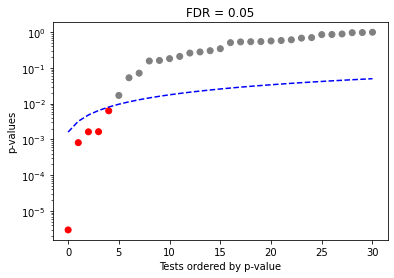

In [151]:
# to find out the Alpha value, which will be the benchmark for predictor selection. Choose a q value to be 0.05
threshold = fdr(pvals, 0.05, plotit=True) 

In [152]:
# Chose pvals that met the benchmark
significant_predictors = pvals[pvals <= 0.006327374134565085].index.tolist()

In [159]:
significant_predictors

['const', 'compactness_mean', 'concavity_se', 'radius_worst', 'area_worst']

In [163]:
significant_predictors = ['compactness_mean', 'concavity_se', 'radius_worst', 'area_worst']

In [173]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [191]:

# Initialize KFold
kf = KFold(n_splits=10, shuffle=True, random_state=11)

# Lists to store metrics for each fold
accuracies = []
r2_scores = []
rmses = []

In [192]:
# Perform K-Fold Cross-Validation
for train_indices, test_indices in kf.split(X):
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

    model = LogisticRegression(max_iter=200)
    model.fit(X_train, y_train)

    pred = model.predict(X_test)
    prob = model.predict_proba(X_test)[:,1]

    accuracy = accuracy_score(y_test, pred)
    r2 = r2_score(y_test, prob)
    rmse = np.sqrt(mean_squared_error(y_test, prob))

    accuracies.append(accuracy)
    r2_scores.append(r2)
    rmses.append(rmse)
    
# Calculate and print the average metrics
print("Average Accuracy:", np.mean(accuracies))
print("Average R-Squared:", np.mean(r2_scores))
print("Average RMSE:", np.mean(rmses))

/Users/xinyutu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/xinyutu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

Average Accuracy: 0.9525689223057643
Average R-Squared: 0.8567861686116869
Average RMSE: 0.1750690718317343


/Users/xinyutu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/xinyutu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

In [194]:
kfold = KFold(n_splits=10, shuffle=True, random_state=11)

# Define the predictors and the target variable
X_reduced = cancer[['compactness_mean', 'concavity_se', 'radius_worst', 'area_worst']] # These are significant predictors we got above
y = cancer['diagnosis_encoded']

# Initialize list to store metrics
accuracies = []
r2_scores = []
rmses = []

# Perform K-Fold Cross-Validation
for train_indices, test_indices in kfold.split(X_reduced):
    X_train, X_test = X_reduced.iloc[train_indices], X_reduced.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

    # Create and fit the logistic regression model
    model = LogisticRegression(max_iter=200)
    model.fit(X_train, y_train)

    # Make predictions and calculate metrics
    pred = model.predict(X_test)
    prob = model.predict_proba(X_test)[:, 1]

    accuracies.append(accuracy_score(y_test, pred))
    r2_scores.append(r2_score(y_test, prob))
    rmses.append(np.sqrt(mean_squared_error(y_test, prob)))

# Calculate and print the average metrics
print("Average Accuracy:", np.mean(accuracies))
print("Average R-Squared:", np.mean(r2_scores))
print("Average RMSE:", np.mean(rmses))

Average Accuracy: 0.9139097744360903
Average R-Squared: 0.7405769346819252
Average RMSE: 0.24322044898287523


Based on these metrics, the full model outperforms the reduced model in terms of both R², Accuracy, and RMSE. It explains more of the variance in the data (higher R²) and has lower average prediction errors (lower RMSE). Because The full model is more complex and has a higher capacity to learn from date, as the R-squared is a lot higher in the full model than in the reduced model.